In [1]:
%run monte_carlo_basic.py


European call options val:   7.999
Duration in sec:   8.694


In [1]:
%run eulers_monte_carlo.py

valuation with eulars numpy:   8.166
time with eulars numpy:   0.610


Text(0, 0.5, 'index level')

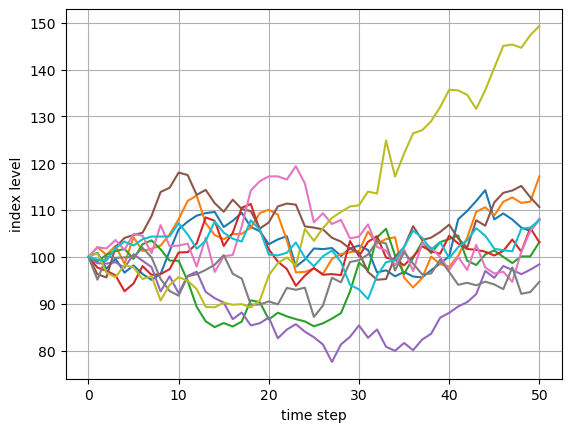

In [2]:
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')

Text(0, 0.5, 'frequency')

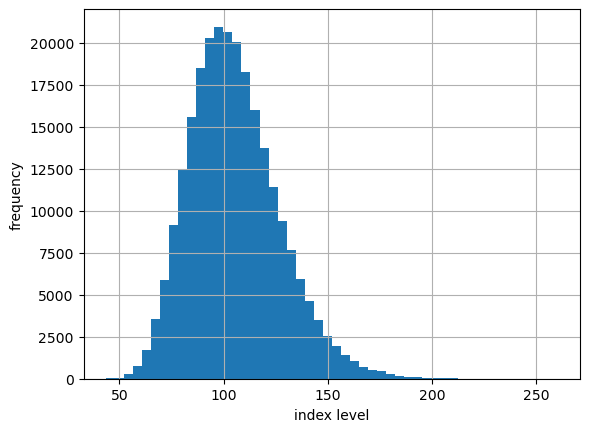

In [4]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')

In [ ]:
plt.hist(np.maximum(S[-1],), bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')